In [9]:
import numpy as np
from numpy import random
from numpy import linalg


import matplotlib as mpl
from matplotlib import pyplot as plt

In [29]:
# system parameters
size = np.arange(2,8,1)
d = 1
mu, sig = 0, 1
prob = 1

# plot parameters
Nrep = 10000
bins = [100, 50]

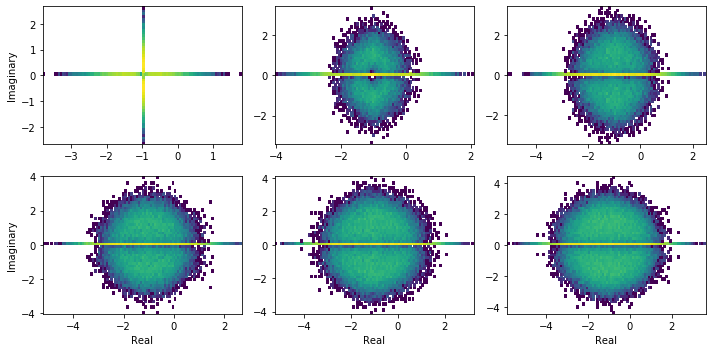

In [30]:
real_eigenvalues = [0 for i in range(len(size))]

fig, ax = plt.subplots(2,3, figsize=(10,5), sharex=False, sharey=False)
ax[0,0].set(ylabel='Imaginary')
ax[1,0].set(xlabel='Real', ylabel='Imaginary')
ax[1,1].set(xlabel='Real')
ax[1,2].set(xlabel='Real')

ii = 0
for s in size:
    eigenReal = np.zeros(s*Nrep)
    eigenImag = np.zeros(s*Nrep)

    for rep in range(Nrep):
        # generating community matrix
        C = random.normal(mu, sig, [s ,s])
        for i in range(s):
            for j in range(s):
                if j == i:
                    C[i,j] = -d
                    continue
                u = random.rand()
                if u > prob:
                    C[i,j] = 0

        # computing eigenvalues
        EV, _ = linalg.eig(C)

        for i in range(s):
            eigenReal[s*rep + i] = EV[i].real
            eigenImag[s*rep + i] = EV[i].imag

    if s in size[0:3]: iax = 0
    else: iax = 1
    jax = int((s-2)%3)    
    
    ax[iax, jax].hist2d(eigenReal, eigenImag, bins = bins, norm = mpl.colors.LogNorm());
    
    real_eigenvalues[ii] = eigenReal
    ii += 1
    
fig.tight_layout()
fig.savefig('May_spectra_' + str(size.min()) + '-'+ str(size.max()) + '.png', dpi=200)

- Why the long, real line?
- 

/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


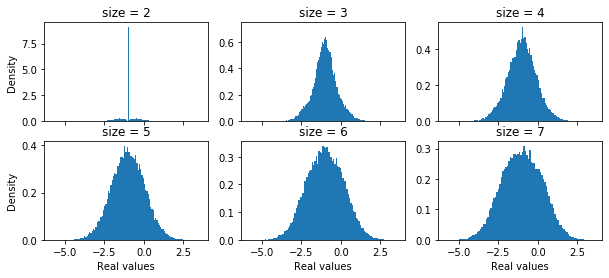

In [35]:
x = np.linspace(-10,5, 100)
r = np.sqrt(size*prob)


fig, ax = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=False)
ax[1,0].set(xlabel='Real values', ylabel='Density')
ax[1,1].set(xlabel='Real values')
ax[1,2].set(xlabel='Real values')
ax[0,0].set(ylabel='Density')

for i in range(2) :
    for j in range(3) :
        ax[i,j].set_title('size = ' + str(min(size)+3*i+j))
        ax[i,j].hist(real_eigenvalues[3*i+j], bins=100, density=True)
        y = np.sqrt(r[3*i+j]**2 - (x+d)**2)
        #ax[i,j].plot(x,y*0.1)
fig.savefig('real_histogram_May.png', dpi=100)